In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Introduction à la manipulation et à l'analyse d'images en Python

La manipulation et l'analise d'images en python est réaliser à l'aide du module [scikit-image](https://scikit-image.org/), qui un des nombreux projets de base de [scipy stack](https://www.scipy.org/docs.html)]. Il éxiste d'autres module permettant de réaliser de l'analise d'image tel que [Pillow](https://python-pillow.org/), [SimpleITK](https://simpleitk.org/), et tant d'autres.

Ce module est un dès plus utilisé pour la manipulation et l'analise d'image en python. La toute première version de scikit-image remonte à août 2009. La version actuelle, et celle utilisé dans cette démonstration de l'utilisation du module, est la version 0.18.3. Le dépot GitHub du projet scikit-image est consultable [ici](https://github.com/scikit-image).

Il est principalement utilisé pour réaliser de la segmentation, du filtrage, de la transformation que nous allons aborder au cours de cette introduction. L'installation du module à partir des gestionnaires de packages [pip](https://pypi.org/) et [conda](https://anaconda.org/) à l'aide des commandes suivantes.  

```bash
# installation with conda :
conda install -c conda-forge scikit-image

# installation with pip :
## Debian/Ubuntu :
sudo apt-get install python-skimage
## OSX :
pip install scikit-image
```

## contexte (william)

La miscroscopie est une technologie qui permet de stimuler les découvertes en biologie. Aujourd'hui beaucoup de résultats basé sur des images de microscopie demande une analyse quantitative. Il est donc nécéssaire de réaliser l'interprétation quantitative du contenu des images en microscopie et détecter automatiquement les objets et réaliser des mesures sur ses objets. Tout comme en génétique l'imagerie génère enormément de données. On pourrais parler de "microscomique", comme on parle de génomique pour l'analyse de données massive en génétique ou de protéomique et métabolomique.




## objectifs (willliam)

L'objectif est d'explorer en surface le module scikit-image. Nous allons donc réaliser une segmentation de l'image (détection des objets de l'image), Nous monterrons comment fitrer les objets abérants. Nous réaliseront aussi une identification des noyaux, et déterminerons la corespondance cellulaire des fluorochromes. Ensuite nous réaliserons des mesures simple de la taille, la fluorescence, la gralunométrie des objets de d'une image.

## ...


# « Images » Manipulation et analyse d'images en Python

Manipulation d’une image de microscopie avec scikit-image et analyses basiques.
  
## Questions et points à aborder ou à traiter :  

- Comment est codée informatiquement une image ?  (jeyani)
- Présenter les données : Quelles différences y a-t-il entre une image au format .tif et des formats d’images plus communs comme le .jpeg ? Quel intérêt d’utiliser le premier format en microscopie ?  (jeyani)
- Comment est composée l’image fournie dans comme donnée (différents canaux) ?  (tristan)
- Comment ouvrir et afficher l’image avec scikit-image ? (tristan)

Choisir un canal (par exemple le bleu) et extraire les principaux objets :  
    - Segmenter l’image (justifier le choix du seuil)
    - Identifier les objets et filtrer les objets aberrants  
    - Effectuer quelques mesures simples (taille, fluorescence  



## Questions et points à aborder ou à traiter :  

### Comment est codée informatiquement une image ?  (jeyani)

En informatique, une image constitue une représentation binaire d'une information visuelle. Cette information peut être un dessin, une image ou encore un graphe. Afin qu'un ordinateur puisse stocker une image, chaque pixel de cette dernière sera représenté par une valeur binaire. Le nombre de bits utilisé définie le nombre de couleur présent dans une image. Nous considérons que pour un nombre x de bits nous aurons 2x couleurs dans notre image. Pour le cas d'une image ne contenant que deux couleurs (noir et blanche) un bit sera suffira pour représenter les couleurs, nous attribuerons la valeur 0 à la couleur noir et 1 à la couleur blanche.
Ci-dessous deux exemples de représentation binaire d'une image : 
- Dans le premier exemple nous allons créer un tableau contenant des valeurs binaire dans le but de créer une image en noir et blanc.


Le tableau binaire permettant la création de l'image est le suivant : 
[[1 1 1 1 1 1]
 [1 0 1 1 0 1]
 [1 0 1 1 0 1]
 [1 1 1 1 1 1]
 [1 0 0 0 0 1]
 [1 1 1 1 1 1]]


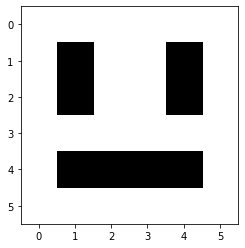

In [2]:
smiley = np.array([[1,1,1,1,1,1],
                  [1,0,1,1,0,1],
                   [1,0,1,1,0,1],
                  [1,1,1,1,1,1],
                  [1,0,0,0,0,1],
                  [1,1,1,1,1,1]])


print(f"Le tableau binaire permettant la création de l'image est le suivant : \n{smiley}")
plt.imshow(smiley, cmap = plt.get_cmap("gray"))

Ainsi, ci-dessus nous pouvons observer comment nous pouvons passer simplement d'un tableau contenant des valeurs binaires à la création d'une image.
- Dans un second exemple, nous allons voir comment refaire cette même image mais cette fois-ci en lui rajoutant des couleurs. Pour faire cela nous utiliserons plus un tableau contenant des valeurs binaires mais le code couleur RGB (pour *Red, Green, Blue*). Ce code correspond à un tuple contenant une valeur pour chacune des trois couleurs allant de 0 (cas où le pixel est éteint) à 255 (cas où le pixel est allumé).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


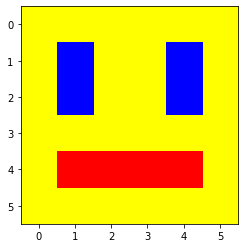

In [3]:
smiley_color = np.array([[(255,255,0),(255,255,0),(255,255,0),(255,255,0),(255,255,0),(2555,255,0)],
                       [(255,255,0),(0,0,255),(255,255,0),(255,255,0),(0,0,255),(255,255,0)],
                       [(255,255,0),(0,0,255),(255,255,0),(255,255,0),(0,0,255),(255,255,0)],
                       [(255,255,0),(255,255,0),(255,255,0),(255,255,0),(255,255,0),(255,255,0)],
                       [(255,255,0),(255,0,0),(255,0,0),(255,0,0),(255,0,0),(255,255,0)],
                       [(255,255,0),(255,255,0),(255,255,0),(255,255,0),(255,255,0),(2555,255,0)]])

plt.imshow(smiley_color)

### Présenter les données : Quelles différences y a-t-il entre une image au format .tif et des formats d’images plus communs comme le .jpeg ? Quel intérêt d’utiliser le premier format en microscopie ?  (jeyani)

Dans le cadre de notre analyse d’image nous disposons de trois images de microscopie de fluorescence au format .tif. Une image peut être stockée sous différents formats comme par exemple les formats : .jpeg, .png, .gif et .tif.  La principale différence entre le format .tif et les autres formats qui sont des formats qui sont plus communément utilisés est la suivante : le format TIFF ne présente pas de compression, dans le cas où il y aurait une compression cela n’impacte pas la qualité de l’image observée. Ce manque de compression implique que la taille du  fichier sera élevée. Le format .tif est donc utilisé pour avoir des images de haute résolution/qualité qui permet d’avoir des images avec des détails important ce qui est idéal pour observer des images de microscopie.

- Comment est composée l’image fournie dans comme donnée (différents canaux) ?  (tristan)
- Comment ouvrir et afficher l’image avec scikit-image ? (tristan)

Choosir un canal (par exemple le bleu) et extraire les principaux objets :  
    - Segmenter l’image (justifier le choix du seuil)
    - Identifier les objets et filtrer les objets aberrants  

- Effectuer quelques mesures simples (taille, fluorescence  